
# <h1><center>DESCRIPTIVE ANALYSIS<BR>BUSINESS LARGE DATASET</center></h1>
    

In [1]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt

The data set 'yelp academic dataset business' can be found here: https://www.yelp.com/dataset

In [2]:
business=pd.read_json('yelp_academic_dataset_business.json',lines=True)

In [3]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ
2,3554 Rue Notre-Dame O,None,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,None,1,45.479984,-73.580070,Felinus,H4C 1P4,5,5.0,QC
3,1015 Sharp Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",0,36.219728,-115.127725,Nevada House of Hose,89030,3,2.5,NV
4,4827 E Downing Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",1,33.428065,-111.726648,USE MY GUY SERVICES LLC,85205,26,4.5,AZ


In [4]:
business.shape

(209393, 14)

In [5]:
business.dtypes

address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object

In [6]:
business.describe()

,is_open,latitude,longitude,review_count,stars
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,0.806632,38.579934,-97.390217,36.937505,3.538055
std,0.394940,4.940448,16.718535,123.343597,1.023543
min,0.000000,21.497258,-158.025525,3.000000,1.000000
25%,1.000000,33.638658,-112.269476,4.000000,3.000000
50%,1.000000,36.147408,-111.743531,9.000000,3.500000
75%,1.000000,43.611693,-79.972679,27.000000,4.500000
max,1.000000,51.299943,-72.806550,10129.000000,5.000000


Now we want to see if there are null values in our dataset. We see that we have a big number of business without attributes or hours. And a few of them without category specification. We won't consider these values further.

In [7]:
business.isnull().sum()

address             0
attributes      29045
business_id         0
categories        524
city                0
hours           44843
is_open             0
latitude            0
longitude           0
name                0
postal_code         0
review_count        0
stars               0
state               0
dtype: int64

We will have to delete them.


## CATEGORIES DISTRIBUTION

We want to see now the 20 most represented categories.

In [8]:
business['categories'].value_counts()[:20]

Nail Salons, Beauty & Spas                   1055
Pizza, Restaurants                           1045
Restaurants, Pizza                           1028
Beauty & Spas, Nail Salons                   1017
Food, Coffee & Tea                            980
Mexican, Restaurants                          928
Coffee & Tea, Food                            913
Restaurants, Mexican                          877
Hair Salons, Beauty & Spas                    857
Restaurants, Chinese                          846
Beauty & Spas, Hair Salons                    842
Chinese, Restaurants                          818
Auto Repair, Automotive                       620
Automotive, Auto Repair                       553
Grocery, Food                                 523
Banks & Credit Unions, Financial Services     497
Italian, Restaurants                          497
Food, Grocery                                 494
Financial Services, Banks & Credit Unions     481
Restaurants, Italian                          428


In [9]:
print('The number of unique categories is:',len(business['categories'].unique()))

The number of unique categories is: 102495


## CITIES DISTRIBUTION

We will now see the represented cities in the dataset along with the number of business for each. Firstly we were only filtering by cities but we didn't consider that in different states some cities could have the same name, so we had to also goup by states. 

In [10]:
cities=business[['state','city']].groupby(['state','city']).count()
cities=cities.reset_index(level=['city'])

In [10]:
BusinessesByCity=(business.groupby(['state','city']).count()).business_id

In [11]:
BusinessesByCity.head()

state  city    
AB                   1
       Airdrie     186
       Alberta       1
       Balzac       11
       Beltline      1
Name: business_id, dtype: int64

In [12]:
BusinessesByCity=pd.DataFrame(BusinessesByCity)

In [13]:
BusinessesByCity.head()

business_id
state city                 
AB                        1
      Airdrie           186
      Alberta             1
      Balzac             11
      Beltline            1

In [14]:
BusinessesByCity=BusinessesByCity.rename(columns={'business_id': 'Number of businesses'})

In [15]:
BusinessesByCity.head()

Number of businesses
state city                          
AB                                 1
      Airdrie                    186
      Alberta                      1
      Balzac                      11
      Beltline                     1

In [16]:
BusinessesByCity=BusinessesByCity.reset_index(level=['state'])

In [17]:
BusinessesByCity=BusinessesByCity.reset_index(level=['city'])


In [18]:
BusinessesByCity.head()

,city,state,Number of businesses
0,,AB,1
1,Airdrie,AB,186
2,Alberta,AB,1
3,Balzac,AB,11
4,Beltline,AB,1


Let's now sort the cities regarding the number of businesses 

In [21]:
business_cities=BusinessesByCity.sort_values(by=['Number of businesses','Number of businesses'],ascending=False).reset_index(drop = True)

In [22]:
business_cities.head()

,city,state,Number of businesses
0,Las Vegas,NV,31623
1,Toronto,ON,20364
2,Phoenix,AZ,20170
3,Charlotte,NC,10417
4,Scottsdale,AZ,9341


In [23]:
business_cities_save=business_cities

In [24]:
print('There are a total of',len(business_cities),' cities represented in this dataset.')
print('The 25 most represented cities are:')
business_cities.head(25)

There are a total of 1306  cities represented in this dataset.
The 25 most represented cities are:


,city,state,Number of businesses
0,Las Vegas,NV,31623
1,Toronto,ON,20364
2,Phoenix,AZ,20170
3,Charlotte,NC,10417
4,Scottsdale,AZ,9341
5,Calgary,AB,8375
6,Pittsburgh,PA,7630
7,MontrÃ©al,QC,6979
8,Mesa,AZ,6577
9,Henderson,NV,5272


The main cities represented within this dataset are in this order: Las Vegas, Toronto, Phoenix and Charlotte. These cities belong to Canada and USA. We will now add the longitude and lattitude of these cities.

In [25]:
lat= business.groupby(['city','state'])['latitude'].mean().reset_index()
long= business.groupby(['city','state'])['longitude'].mean().reset_index()

In [26]:
lat.index

RangeIndex(start=0, stop=1306, step=1)

In [27]:
lat.head()

,city,state,latitude
0,,AB,51.220252
1,,AZ,33.338097
2,110 Las Vegas,NV,36.099575
3,4321 W Flamingo Rd,NV,36.114128
4,ARSENAL,PA,40.480242


In [28]:
cities=business_cities
cities.head()

,city,state,Number of businesses
0,Las Vegas,NV,31623
1,Toronto,ON,20364
2,Phoenix,AZ,20170
3,Charlotte,NC,10417
4,Scottsdale,AZ,9341


In [29]:
citiesm=cities.merge(lat, on=['city', 'state'])
citiesm=citiesm.merge(long,on=['city', 'state'])

In [30]:
cities.head()

,city,state,Number of businesses
0,Las Vegas,NV,31623
1,Toronto,ON,20364
2,Phoenix,AZ,20170
3,Charlotte,NC,10417
4,Scottsdale,AZ,9341


In [31]:
citiesm.head(20)

,city,state,Number of businesses,latitude,longitude
0,Las Vegas,NV,31623,36.131189,-115.196990
1,Toronto,ON,20364,43.679515,-79.394858
2,Phoenix,AZ,20170,33.527705,-112.060934
3,Charlotte,NC,10417,35.194576,-80.832750
4,Scottsdale,AZ,9341,33.572832,-111.910520
5,Calgary,AB,8375,51.039439,-114.069448
6,Pittsburgh,PA,7630,40.447351,-79.986764
7,MontrÃ©al,QC,6979,45.511964,-73.586688
8,Mesa,AZ,6577,33.406759,-111.781465
9,Henderson,NV,5272,36.031300,-115.056792


# MAP

In [32]:
Interesting_City=citiesm

In [33]:
Interesting_City['radius'] = pd.cut(Interesting_City['Number of businesses'], bins=20, 
                              labels=['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
Interesting_City['color'] = pd.cut(Interesting_City['Number of businesses'], bins=5, 
                              labels=['blue', 'green', 'yellow', 'red','black'])

In [34]:
# Kansas location
lat_SF = 38.5
lon_SF = -98

map_SF = folium.Map([lat_SF, lon_SF], zoom_start=4)
business_pa=Interesting_City.copy()
for index, row in business_pa.iterrows():
    lon = row['longitude']
    lat = row['latitude']
    popup_str = row['city']
    
    # Circle marker
    folium.CircleMarker([lat, lon],
                        radius=row['radius'],
                        popup=popup_str,
                        color=row['color'],
                        ).add_to(map_SF)

map_SF

# Filter on the metropolis !

In [35]:
metropolis=citiesm[citiesm['city'].isin(['Las Vegas','Toronto','Phoenix','Charlotte','Calgary','Pittsburgh','MontrÃ©al','Cleveland','Madison'])]



Of course, we have too much cities with this name:

In [36]:
metropolis.head(100)

,city,state,Number of businesses,latitude,longitude,radius,color
0,Las Vegas,NV,31623,36.131189,-115.196990,20,black
1,Toronto,ON,20364,43.679515,-79.394858,13,red
2,Phoenix,AZ,20170,33.527705,-112.060934,13,red
3,Charlotte,NC,10417,35.194576,-80.832750,7,green
5,Calgary,AB,8375,51.039439,-114.069448,6,green
6,Pittsburgh,PA,7630,40.447351,-79.986764,5,green
7,MontrÃ©al,QC,6979,45.511964,-73.586688,5,green
12,Cleveland,OH,3856,41.476587,-81.680935,3,blue
15,Madison,WI,3684,43.075841,-89.400280,3,blue
482,Las Vegas,CA,4,36.125880,-115.149999,1,blue


Let's consider the eight we mentionned

In [37]:
metropolis=metropolis.reset_index(drop = True)

In [38]:
metropolis=metropolis.head(9)

In [39]:
metropolis.head(10)

,city,state,Number of businesses,latitude,longitude,radius,color
0,Las Vegas,NV,31623,36.131189,-115.196990,20,black
1,Toronto,ON,20364,43.679515,-79.394858,13,red
2,Phoenix,AZ,20170,33.527705,-112.060934,13,red
3,Charlotte,NC,10417,35.194576,-80.832750,7,green
4,Calgary,AB,8375,51.039439,-114.069448,6,green
5,Pittsburgh,PA,7630,40.447351,-79.986764,5,green
6,MontrÃ©al,QC,6979,45.511964,-73.586688,5,green
7,Cleveland,OH,3856,41.476587,-81.680935,3,blue
8,Madison,WI,3684,43.075841,-89.400280,3,blue


citiesm is the data frame with all of our cities and metropolis is the data frame with our nine metropolis

In [40]:
lat=citiesm['latitude']
long= citiesm['longitude']
Vector_metropolis=[]

lat_metropolis=metropolis['latitude']
long_metropolis=metropolis['longitude']
city_metropolis=metropolis['city']


Vector_distance=[]

As we have seen on the map, Cleveland and Pittburh are the two metropolis that are the closest to each other, around 180 kilometers.

In [41]:
# parameters: the nimber of kilometers of the radius of earth

r=6371


There are many way to have access to the distance between two points when we have their longitude and latitude. We used the one using the law of sinus.


In [42]:
distance_closest_metropolis=r* np.arccos ( np.sin( lat_metropolis[5]*np.pi/180 )*np.sin( lat_metropolis[7]*np.pi/180 ) + np.cos( lat_metropolis[5]*np.pi/180 )*np.cos( lat_metropolis[7]*np.pi/180 )*np.cos((long_metropolis[5]-long_metropolis[7])*np.pi/180))


print(distance_closest_metropolis)

182.5715938091644


We have 182 kilometers for the distance between Cleveland and Pittburh

For each city, we will calculate the minimum distance between this city and the metropolis

In [43]:
for i in range (len(lat)):
    x=lat[i]
    y=long[i]
    indic =0
    mini=r* np.arccos ( np.sin( lat_metropolis[0]*np.pi/180 )*np.sin(x*np.pi/180 ) + np.cos( lat_metropolis[0]*np.pi/180 )*np.cos( x*np.pi/180 )*np.cos((long_metropolis[0]-y)*np.pi/180))
    for j in range (1,len(lat_metropolis)):

        distance=r* np.arccos ( np.sin( lat_metropolis[j]*np.pi/180 )*np.sin(x*np.pi/180 ) + np.cos( lat_metropolis[j]*np.pi/180 )*np.cos( x*np.pi/180 )*np.cos((long_metropolis[j]-y)*np.pi/180))
        
        if distance < mini:
            indic=j
            mini=distance
            
    Vector_metropolis.append(city_metropolis[indic])
    Vector_distance.append(mini)


Unfortunately, as we have seen in the map some cities (but a few) are far from our metropolis. 

In [44]:
print(max(Vector_distance))

4436.254811145659


(array([748., 416.,  99.,   7.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   8.,  10.,   7.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

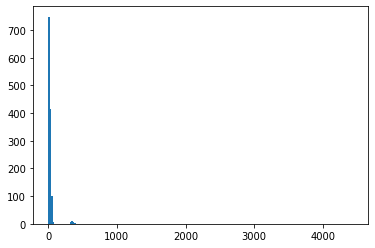

In [45]:
plt.hist(Vector_distance,bins=200)

We have:
-748 cities that are between 0 and 22 km to their metropolis.
-416 cities that are between 22 and 44 km to their metropolis.
-99 cities that are between 44 and 66 km to their metropolis.
-7 cities between 66 and 88 km.


In [46]:
citiesm['metropolis']=Vector_metropolis
citiesm['distance metropolis']=Vector_distance

In [47]:
citiesm.head(150)

,city,state,Number of businesses,latitude,longitude,radius,color,metropolis,distance metropolis
0,Las Vegas,NV,31623,36.131189,-115.196990,20,black,Las Vegas,0.000000
1,Toronto,ON,20364,43.679515,-79.394858,13,red,Toronto,0.000000
2,Phoenix,AZ,20170,33.527705,-112.060934,13,red,Phoenix,0.000000
3,Charlotte,NC,10417,35.194576,-80.832750,7,green,Charlotte,0.000000
4,Scottsdale,AZ,9341,33.572832,-111.910520,6,green,Phoenix,14.814670
5,Calgary,AB,8375,51.039439,-114.069448,6,green,Calgary,0.000000
6,Pittsburgh,PA,7630,40.447351,-79.986764,5,green,Pittsburgh,0.000000
7,MontrÃ©al,QC,6979,45.511964,-73.586688,5,green,MontrÃ©al,0.000000
8,Mesa,AZ,6577,33.406759,-111.781465,5,green,Phoenix,29.204111
9,Henderson,NV,5272,36.031300,-115.056792,4,blue,Las Vegas,16.795832


In [48]:
print(len(citiesm[citiesm['distance metropolis']<90])/len(citiesm))


0.9724349157733537


We have 97% of our cities that are inside these 8 metropolis.

In [49]:
new_citiesm=citiesm.loc[:,['city','state','metropolis','distance metropolis']]



Let's merge this with the business data  frame

In [50]:
new_business=business.merge(new_citiesm, on=['city', 'state'])

In [51]:
new_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,metropolis,distance metropolis
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC,Charlotte,31.479344
1,21206 Catawba Ave,"{'BusinessParking': '{'garage': False, 'street...",90oH6tilpqsCkz7Dhcxejw,"Massage Therapy, Health & Medical, Beauty & Sp...",Cornelius,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1,35.482426,-80.862377,Massage In Davidson,28031,16,5.0,NC,Charlotte,31.479344
2,20124 W Catawba,"{'RestaurantsGoodForGroups': 'False', 'Restaur...",MyiqKhZd8N08q9qilxRcPQ,"Food, Bakeries, Restaurants, Pizza",Cornelius,None,0,35.482247,-80.880667,Our Daily Bread,28031,5,4.0,NC,Charlotte,31.479344
3,,None,1KgIKyWcd0ex5pJkoDxRgg,"Contractors, Home Services",Cornelius,None,1,35.472468,-80.887586,CJG Construction,28031,3,3.5,NC,Charlotte,31.479344
4,19706 One Norman Blvd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",4U2JtoWJbhC-NAltPLdtEA,"Used, Vintage & Consignment, Shopping, Fashion...",Cornelius,None,0,35.480612,-80.881848,The Salvation Army,28031,6,4.0,NC,Charlotte,31.479344


In [52]:
new_business[new_business['distance metropolis']<90]['metropolis'].value_counts()


Phoenix       60824
Las Vegas     39107
Toronto       36635
Charlotte     17548
Cleveland     16395
Pittsburgh    12377
MontrÃ©al     10259
Calgary        8680
Madison        5524
Name: metropolis, dtype: int64

We can write it into csv

In [53]:
new_business.to_excel('Business-Metropolis.xlsx', index = False)

# Map

In [54]:
Interesting_City=new_business[new_business['distance metropolis']<90]

In [55]:
BusinessesByCity=(Interesting_City.groupby(['state','city']).count()).business_id

In [56]:
BusinessesByCity=pd.DataFrame(BusinessesByCity)

In [57]:
BusinessesByCity=BusinessesByCity.rename(columns={'business_id': 'Number of businesses'})

In [58]:
BusinessesByCity=BusinessesByCity.reset_index(level=['city'])
BusinessesByCity=BusinessesByCity.reset_index(level=['state'])

In [59]:
BusinessesByCity.head()

,state,city,Number of businesses
0,AB,,1
1,AB,Airdrie,186
2,AB,Alberta,1
3,AB,Balzac,11
4,AB,Beltline,1


In [60]:
BusinessesByCity=BusinessesByCity.rename(columns={'business_id': 'Number of businesses'})

In [61]:
business_cities=BusinessesByCity.sort_values(by=['Number of businesses','Number of businesses'],ascending=False).reset_index(drop = True)

In [62]:
lat= business.groupby(['city','state'])['latitude'].mean().reset_index()
long= business.groupby(['city','state'])['longitude'].mean().reset_index()

In [63]:
cities=business_cities
cities.head()

,state,city,Number of businesses
0,NV,Las Vegas,31623
1,ON,Toronto,20364
2,AZ,Phoenix,20170
3,NC,Charlotte,10417
4,AZ,Scottsdale,9341


In [64]:
citiesm=cities.merge(lat, on=['city', 'state'])
citiesm=citiesm.merge(long,on=['city', 'state'])

In [65]:
citiesm.head()

,state,city,Number of businesses,latitude,longitude
0,NV,Las Vegas,31623,36.131189,-115.196990
1,ON,Toronto,20364,43.679515,-79.394858
2,AZ,Phoenix,20170,33.527705,-112.060934
3,NC,Charlotte,10417,35.194576,-80.832750
4,AZ,Scottsdale,9341,33.572832,-111.910520


In [66]:
Interesting_City=citiesm

In [67]:
Interesting_City['radius'] = pd.cut(Interesting_City['Number of businesses'], bins=20, 
                              labels=['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
Interesting_City['color'] = pd.cut(Interesting_City['Number of businesses'], bins=5, 
                              labels=['blue', 'green', 'yellow', 'red','black'])

So we will plot the new repartition of the businesses:

In [68]:
# Kansas location
lat_SF = 38.5
lon_SF = -98

map_SF = folium.Map([lat_SF, lon_SF], zoom_start=4)
business_pa=Interesting_City.copy()
for index, row in business_pa.iterrows():
    lon = row['longitude']
    lat = row['latitude']
    popup_str = row['city']
    
    # Circle marker
    folium.CircleMarker([lat, lon],
                        radius=row['radius'],
                        popup=popup_str,
                        color=row['color'],
                        ).add_to(map_SF)

map_SF

## RATING DISTRIBUTIONS

Let's work on the rating distribution, to understand and analyze te data set

In [69]:
business=pd.read_excel('Business-Metropolis.xlsx')

In [70]:
business=business[business['distance metropolis']<90]

The mean rating across the dataset is: 3.539525148421261
With the following distribution:


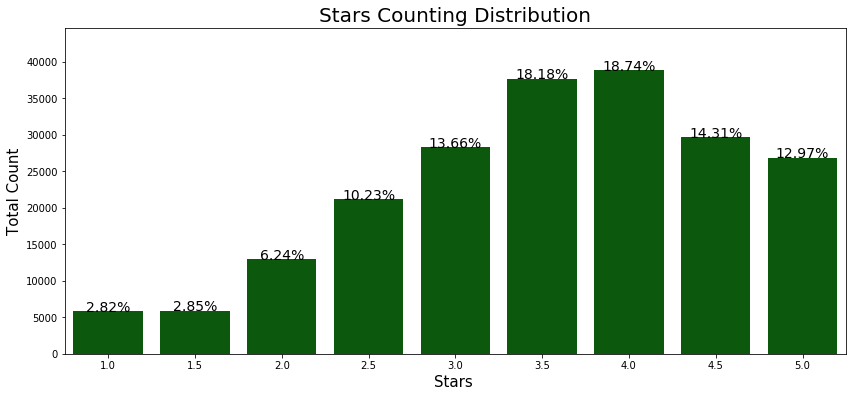

In [71]:
import seaborn as sns
total = len(business)
plt.figure(figsize=(14,6))

g = sns.countplot(x='stars', color='darkgreen',
                  data=business)
g.set_title("Stars Counting Distribution", fontsize=20)
g.set_xlabel("Stars ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)
print('The mean rating across the dataset is:',business['stars'].mean())
print('With the following distribution:')
plt.show()

In [72]:
stars=business.groupby(['state','city'])['stars'].mean().reset_index()

In [73]:
stars.head()

,state,city,stars
0,AB,Airdrie,3.137097
1,AB,Alberta,2.500000
2,AB,Balzac,2.954545
3,AB,Beltline,5.000000
4,AB,CALGARY,2.500000


In [74]:
len(stars)

1268

In [75]:
BusinessesByCity=(business.groupby(['state','city']).count()).business_id
BusinessesByCity=pd.DataFrame(BusinessesByCity)
BusinessesByCity=BusinessesByCity.rename(columns={'business_id': 'Number of businesses'})
BusinessesByCity=BusinessesByCity.reset_index(level=['state'])
BusinessesByCity=BusinessesByCity.reset_index(level=['city'])
business_cities=BusinessesByCity.sort_values(by=['Number of businesses','Number of businesses'],ascending=False).reset_index(drop = True)

In [76]:
len(business_cities)

1268

In [77]:
business_cities.head()

,city,state,Number of businesses
0,Las Vegas,NV,31623
1,Toronto,ON,20364
2,Phoenix,AZ,20170
3,Charlotte,NC,10417
4,Scottsdale,AZ,9341


In [78]:
citiess=business_cities.merge(stars, on=['state','city'])
citiess=citiess[citiess['Number of businesses']>1500]


In [79]:
stars=citiess.sort_values(by=['stars'])

This is the distribution across the main cities:


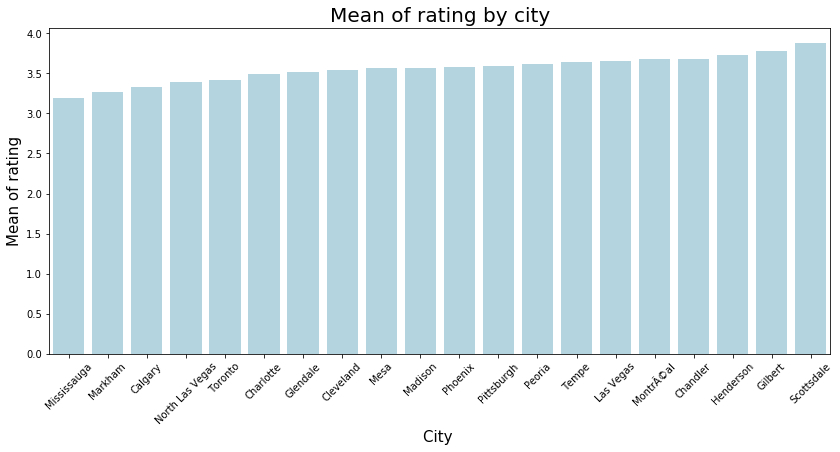

In [80]:

total = len(stars)
plt.figure(figsize=(14,6))

g = sns.barplot(x='city', y='stars',color='lightblue',
                  data=stars)
g.set_title("Mean of rating by city", fontsize=20)
g.set_xlabel("City ", fontsize=15)
g.set_ylabel("Mean of rating", fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

print('This is the distribution across the main cities:')
plt.show()

The mean rating is constant regarding the different cities

# On the Metropolis  

In [81]:
business=pd.read_excel('Business-Metropolis.xlsx')

In [82]:
business=business[business['distance metropolis']<90]

In [83]:
stars_metropolis=business.groupby(['metropolis'])['stars'].mean().reset_index()

In [84]:
stars_metropolis.head(10)

,metropolis,stars
0,Calgary,3.324482
1,Charlotte,3.488888
2,Cleveland,3.457884
3,Las Vegas,3.654844
4,Madison,3.574222
5,MontrÃ©al,3.607077
6,Phoenix,3.646792
7,Pittsburgh,3.549083
8,Toronto,3.322697


In [85]:
stars_metropolis=business.groupby(['metropolis'])['stars'].std().reset_index()

In [86]:
stars_metropolis.head(10)

,metropolis,stars
0,Calgary,1.009252
1,Charlotte,1.030794
2,Cleveland,1.022280
3,Las Vegas,1.028099
4,Madison,0.993603
5,MontrÃ©al,0.891984
6,Phoenix,1.055016
7,Pittsburgh,0.995584
8,Toronto,0.964846


The standard deviation is also constant regarding the different metropolisses

# Search for chain

We can also study the different chain present in the dataset.

In [87]:
business['name'].value_counts()[:20]

Starbucks                1177
McDonald's                842
Subway Restaurants        597
Tim Hortons               388
Burger King               331
Taco Bell                 329
Wendy's                   318
Pizza Hut                 316
Walgreens                 314
The UPS Store             307
Circle K                  284
CVS Pharmacy              270
Great Clips               254
Subway                    242
Enterprise Rent-A-Car     233
Domino's Pizza            226
Dunkin'                   217
KFC                       211
7-Eleven                  209
Wells Fargo Bank          198
Name: name, dtype: int64

In [88]:
business_name=business['name'].value_counts()

business_name=pd.DataFrame(business_name)


business_name=business_name.rename(columns={'name': 'number'})

business_name.index

Index(['Starbucks', 'McDonald's', 'Subway Restaurants', 'Tim Hortons',
       'Burger King', 'Taco Bell', 'Wendy's', 'Pizza Hut', 'Walgreens',
       'The UPS Store',
       ...
       'Tottie's Asian Fusion', 'Tao Tea Leaf Mississauga',
       'Without Walls Christian Center', 'AzBounceHouses', 'The Pretty Haus',
       'RollCare Medical Services', 'Momma's Place', 'Fox & Girl Salon',
       'Advanced Care Dental', 'Rare Essence Braiding Studio'],
      dtype='object', length=155761)

In [89]:
print('The number of unique chain is:',len(business['name'].unique()))

The number of unique chain is: 155762


Let's now focus on the chains that have more than 10 businesses 

In [90]:
Interesting_business=business_name[business_name['number'] > 10]

In [91]:
list_business=Interesting_business.index

In [92]:
business_chain=business[business['name'].isin(list_business)]

In [93]:
business_chain.index

Int64Index([     5,     16,     28,     45,     77,     82,     95,    104,
               124,    125,
            ...
            209320, 209322, 209328, 209337, 209341, 209346, 209356, 209361,
            209368, 209379],
           dtype='int64', length=31143)

And only in the same city

In [94]:
def is_unique(s):
    a = s.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a[1:]).all()

In [95]:
List_local_chain=[]

for chain in business_chain['name']:
    new_business_chain=business_chain[business_chain['name']==chain]
    
    
    if is_unique(new_business_chain['city']):
        List_local_chain.append(chain)
        
        
    
    




In [96]:
from collections import Counter
Counter(List_local_chain)

Counter({'Ted Wiens Tire & Auto': 11, 'Good Earth Cafe': 11, 'Co-op': 17})

In [97]:
business_cafe=business[business['name']=='Good Earth Cafe']

In [98]:
print(len(business_cafe))

11


Let's analyze the only restaurant/cafe of this three businesses

In [99]:
business_cafe.head(12)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,metropolis,distance metropolis
75515,5255 Richmond Road SW,"{'BikeParking': 'None', 'WiFi': 'None', 'Busin...",cHW-RqsFowqNh0WJ4en_pQ,"Food, Coffee & Tea",Calgary,NaN,0,51.017069,-114.160667,Good Earth Cafe,T3E 7C4,10,1.5,AB,Calgary,0.0
77219,1403 29th Street NW,"{'BusinessParking': ""{'garage': False, 'street...",ebYc-KNJbooPFpui3SLB8g,"Food, Coffee & Tea",Calgary,"{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'...",1,51.066326,-114.129513,Good Earth Cafe,T2N,3,3.5,AB,Calgary,0.0
79031,1600 90th Avenue SW,"{'RestaurantsPriceRange2': '2', 'OutdoorSeatin...",uxrk_p--7VTzR5RkBTMoXg,"Food, Coffee & Tea",Calgary,NaN,1,50.973279,-114.099314,Good Earth Cafe,T2V 5A8,19,3.5,AB,Calgary,0.0
80983,7007 14 St SW,"{'OutdoorSeating': 'False', 'BikeParking': 'Tr...",NVuKsmbvihPqMe4WVcGv3A,"Coffee & Tea, Food",Calgary,NaN,1,50.989860,-114.097291,Good Earth Cafe,T2V,3,3.5,AB,Calgary,0.0
81212,4017 50th Street SW,"{'BusinessParking': ""{'garage': False, 'street...",luj6MFp9ww0YoC9b6rW_wA,"Food, Coffee & Tea",Calgary,"{'Monday': '6:30-21:0', 'Tuesday': '6:30-21:0'...",0,51.017073,-114.160696,Good Earth Cafe,T3E 7C5,3,2.0,AB,Calgary,0.0
81421,230 - 333 5th Ave SW,"{'WiFi': ""u'free'"", 'OutdoorSeating': 'False',...",7iD8y50X2PjxClItUnTybg,"Food, Coffee & Tea",Calgary,NaN,0,51.048295,-114.069844,Good Earth Cafe,T2P,4,3.0,AB,Calgary,0.0
81661,200 Barclay Parade SW,"{'BusinessParking': ""{'garage': False, 'street...",905y4M-RFgL2TiSsaKGxzg,"Food, Coffee & Tea",Calgary,"{'Monday': '6:30-21:0', 'Tuesday': '6:30-21:0'...",1,51.052574,-114.068347,Good Earth Cafe,T2P 4R5,13,2.5,AB,Calgary,0.0
81810,2500 University Drive NW,"{'BusinessParking': ""{'garage': False, 'street...",PQUx2GMFU__9a77wsVhXRw,"Coffee & Tea, Food",Calgary,NaN,1,51.075591,-114.129571,Good Earth Cafe,T2H 1N1,4,2.5,AB,Calgary,0.0
82554,1213 4th Street SW,"{'OutdoorSeating': 'True', 'WiFi': ""'free'"", '...",0YdMshGqe6jwScBeeAGhSQ,"Food, Coffee & Tea",Calgary,"{'Monday': '6:30-21:0', 'Tuesday': '6:30-21:0'...",1,51.040918,-114.071829,Good Earth Cafe,T2R 1M1,8,3.0,AB,Calgary,0.0
82718,602 1st Street SW,"{'WiFi': ""u'free'"", 'OutdoorSeating': 'False',...",VD068qWa-P0AzTXGvjNynQ,"Coffee & Tea, Food",Calgary,"{'Monday': '6:0-17:0', 'Tuesday': '6:0-17:0', ...",0,51.047357,-114.065175,Good Earth Cafe,T2P,10,3.5,AB,Calgary,0.0


This chain for example is only in Calgary and not in the other metropolisses. But the businesses of this chain don't have a good reputation regarding the stars.